# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Importing Dataset

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualizing the data

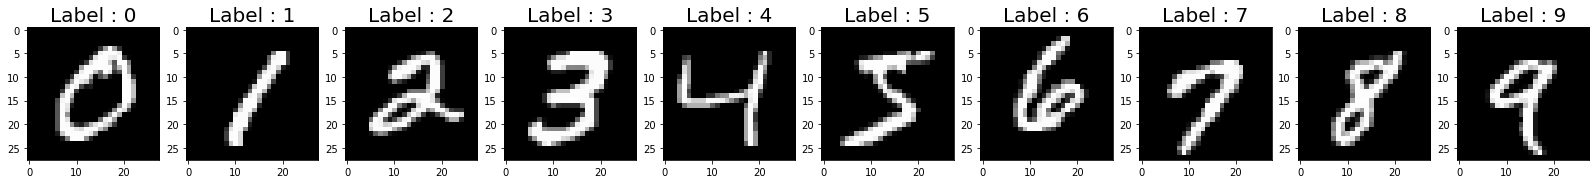

In [4]:
# Visualizing the data
num_classes= 10
f , ax = plt.subplots(1, num_classes, figsize=(28,28))

for i in range (0, num_classes):
    sample = x_train[ y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Label : {}".format(i), fontsize = 20)

In [5]:
# Visualizing the labels
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [6]:
# Converting the labels in a better format
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Data Preparation

### Data Normalization

In [8]:
# We need to normalize the data so we take all the values from 0 to 255 and we
# normalize them between 0 and 1 dividing by 255. This will make help a lot 
# with our calculations later.

x_train = x_train / 255.0
x_test = x_test / 255.0

### Data Reshaping

In [9]:
#lets see the data shape as it is
x_train[0].shape

(28, 28)

In [10]:
# We will flatten the data from (28,28) to (748,)

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create the Model (Fully Connected NN)

In [11]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [13]:
batch_size = 512
epochs = 10
model.fit(x = x_train, y= y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/10
118/118 [==============================] - 1s 5ms/step - loss: 0.6035 - accuracy: 0.8265
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2246 - accuracy: 0.9344
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1648 - accuracy: 0.9523
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1314 - accuracy: 0.9614
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1091 - accuracy: 0.9673
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0926 - accuracy: 0.9725
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0800 - accuracy: 0.9765
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0704 - accuracy: 0.9785
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0620 - accuracy: 0.9811
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0536 - accuracy: 0.9843

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 524us/step - loss: 0.0692 - accuracy: 0.9788
Test Loss: 0.06921415030956268, Test Accuracy: 0.9787999987602234
